In [1]:
from google.colab import files
# files.upload()
import os
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c project-4-whale-calls-2024-2
!unzip project-4-whale-calls-2024-2.zip -d ./dataset
!ls ./dataset


Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: ./dataset/train/train/55.wav  
  inflating: ./dataset/train/train/550.wav  
  inflating: ./dataset/train/train/5500.wav  
  inflating: ./dataset/train/train/5501.wav  
  inflating: ./dataset/train/train/5502.wav  
  inflating: ./dataset/train/train/5503.wav  
  inflating: ./dataset/train/train/5504.wav  
  inflating: ./dataset/train/train/5505.wav  
  inflating: ./dataset/train/train/5506.wav  
  inflating: ./dataset/train/train/5507.wav  
  inflating: ./dataset/train/train/5508.wav  
  inflating: ./dataset/train/train/5509.wav  
  inflating: ./dataset/train/train/551.wav  
  inflating: ./dataset/train/train/5510.wav  
  inflating: ./dataset/train/train/5511.wav  
  inflating: ./dataset/train/train/5512.wav  
  inflating: ./dataset/train/train/5513.wav  
  inflating: ./dataset/train/train/5514.wav  
  inflating: ./dataset/train/train/5515.wav  
  inflating: ./dataset/train/train/5516.wav  
  inflating: ./dataset/

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import librosa

warnings.filterwarnings('ignore')

In [3]:
dir = '/content/dataset/train/train/'
dirs_train = os.listdir(dir)

In [4]:
dir = '/content/dataset/test/test/'
dirs_test = os.listdir(dir)

In [ ]:
import librosa


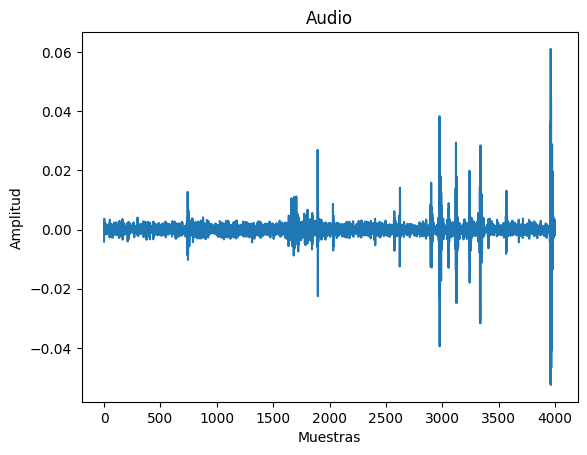

In [ ]:
import matplotlib.pyplot as plt
plt.plot(audio)
plt.title('Audio')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()


In [ ]:
dir_audio = os.path.join(dir, check[1])
audio2, sr = librosa.load(dir_audio, sr=None)  # sr=None conserva la tasa de muestreo original


In [85]:
labels = pd.read_csv('/content/dataset/train.csv')
labels.head()

,idx,class
0,0,NoWhale
1,1,RightWhale
2,2,NoWhale
3,3,NoWhale
4,4,NoWhale


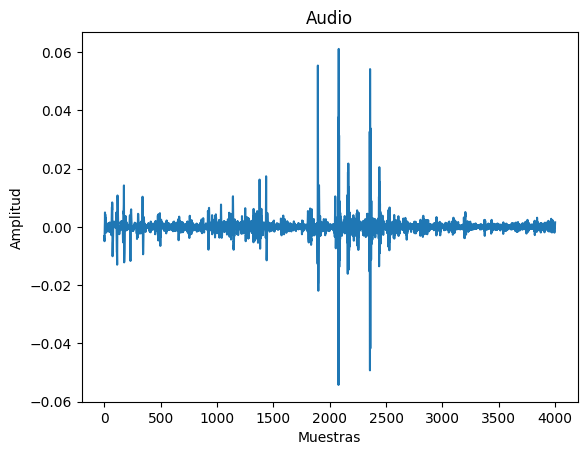

In [ ]:
plt.plot(audio)
plt.title('Audio')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()


In [6]:
dir = '/content/dataset/train/train/'

In [86]:
labels['output'] = labels['class'].apply(lambda x: 1 if x == 'RightWhale' else 0)

In [87]:
labels['output'].value_counts()

,count
output,
0,5467
1,5467


In [88]:
labels.head()

,idx,class,output
0,0,NoWhale,0
1,1,RightWhale,1
2,2,NoWhale,0
3,3,NoWhale,0
4,4,NoWhale,0


In [9]:
waves = []
for i in range(len(dirs_train)):
  dir_audio = os.path.join(dir, dirs_train[i])
  audio, sr = librosa.load(dir_audio, sr=None)
  waves.append(audio)

In [ ]:
waves[0].shape

(4000,)

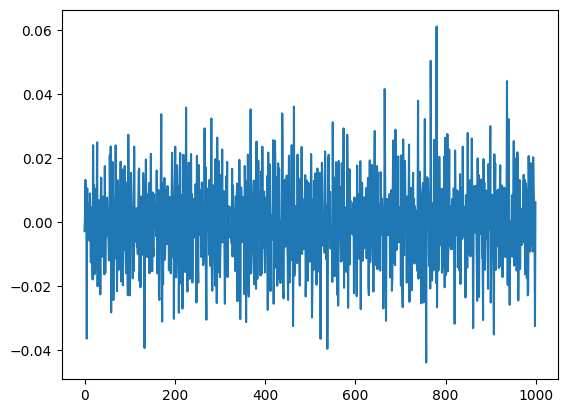

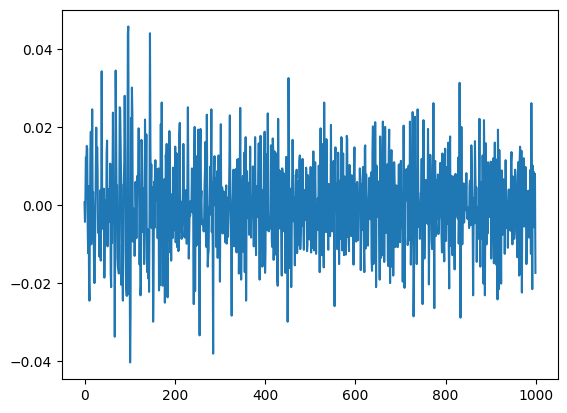

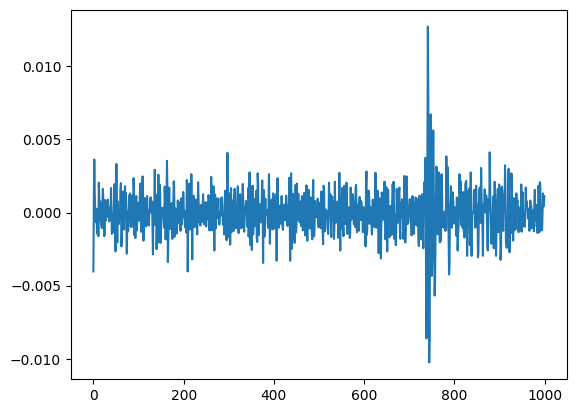

In [ ]:
for wave in waves[:3]:
  plt.plot(wave[:1000])
  plt.show()

In [90]:
labels.head()

,idx,class,output
0,0,NoWhale,0
1,1,RightWhale,1
2,2,NoWhale,0
3,3,NoWhale,0
4,4,NoWhale,0


In [106]:
base = "/content/dataset/train/train"

In [108]:
check = {int(dir.split('.')[0]): os.path.join(base, dir) for dir in dirs_train}

In [114]:
labels.iloc[0]['output']

0

In [115]:
audio_data = []
audio_labels = []
for idx, path in check.items():
  # print(row)
  audio, sr = librosa.load(path, sr=None)
  audio_data.append(audio)
  audio_labels.append(labels.iloc[idx]['output'])
  # audio_data.append(audio)

In [116]:
input = np.array(audio_data)
output = np.array(audio_labels)


In [117]:
input.shape

(10934, 4000)

In [121]:
input_temp = input.reshape(input.shape[0], input.shape[1], 1)
print(input_temp.shape)

(10934, 4000, 1)


In [124]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
input_temp_scaled = scaler.fit_transform(input_temp[:,:,0])
input_temp = input_temp_scaled.reshape(input_temp.shape)
print('Shape of the scaled data matrix: ', input_temp.shape)

Shape of the scaled data matrix:  (10934, 4000, 1)


In [73]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
input = input_temp[:, :, 0]
input_standardized = scaler.fit_transform(input)
input_standardized = input_standardized.reshape(input_temp.shape)

In [125]:
from sklearn.model_selection import train_test_split
import numpy as np


X_train, X_temp, y_train, y_temp = train_test_split(input_temp, output, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

print("Tamaño del conjunto de etiquetas del conjunto de entrenamiento:", y_train.shape)
print("Tamaño del conjunto de etiquetas del conjunto de validación:", y_val.shape)
print("Tamaño del conjunto de etiquetas del conjunto de prueba:", y_test.shape)


Tamaño del conjunto de entrenamiento: (6560, 4000, 1)
Tamaño del conjunto de validación: (2187, 4000, 1)
Tamaño del conjunto de prueba: (2187, 4000, 1)
Tamaño del conjunto de etiquetas del conjunto de entrenamiento: (6560,)
Tamaño del conjunto de etiquetas del conjunto de validación: (2187,)
Tamaño del conjunto de etiquetas del conjunto de prueba: (2187,)


In [16]:
from sklearn.model_selection import train_test_split
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

print("Tamaño del conjunto de etiquetas del conjunto de entrenamiento:", y_train.shape)
print("Tamaño del conjunto de etiquetas del conjunto de prueba:", y_test.shape)


Tamaño del conjunto de entrenamiento: (8747, 4000, 1)
Tamaño del conjunto de prueba: (2187, 4000, 1)
Tamaño del conjunto de etiquetas del conjunto de entrenamiento: (8747,)
Tamaño del conjunto de etiquetas del conjunto de prueba: (2187,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Reshape
from keras.optimizers import Adam


In [17]:
import tensorflow as tf
#from tensorflow.keras.models import Sequential
from keras.src.models.sequential import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
#from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.src.callbacks.early_stopping import EarlyStopping
from keras.src.callbacks.model_checkpoint import ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from keras.src.saving.saving_api import load_model
from keras.src.saving.saving_api import save_model

In [ ]:
class SismicCNNLSTM:
    def __init__(self, sequence_length: int, n_features: int):
        """
        Inicializa el modelo CNN-LSTM para detección de fallas sísmicas.

        sequence_length : int
            Longitud de la secuencia temporal
        n_features : int
            Número de características (6 en este caso: tiempo + 5 aceleraciones)
        """
        self.sequence_length = sequence_length
        self.n_features = n_features
        self.model = self._build_model()
        self.history = None


    def _build_model(self) -> Sequential:
        """
        Construye la arquitectura CNN-LSTM.
        """
        model = Sequential([
            # Primera capa convolucional
            Conv1D(filters=64, kernel_size=5, activation='relu',
                  input_shape=(self.sequence_length, self.n_features),
                  padding='same'),
            BatchNormalization(),
            MaxPooling1D(pool_size=1),

            # Segunda capa convolucional
            Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
            BatchNormalization(),
            MaxPooling1D(pool_size=1),

            # Tercera capa convolucional
            Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
            BatchNormalization(),
            MaxPooling1D(pool_size=1),

            # Capas LSTM
            LSTM(100, return_sequences=True),
            Dropout(0.3),
            LSTM(50),
            Dropout(0.3),

            # Capas densas
            Dense(50, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            Dense(20, activation='relu'),
            Dense(1, activation='sigmoid')
        ])

        # Compilar modelo
        model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
        )

        return model


    def train(self,
              X_train: np.ndarray,
              y_train: np.ndarray,
              X_val: np.ndarray,
              y_val: np.ndarray,
              epochs: int = 100,
              batch_size: int = 32,
              patience: int = 15,
              model_path: str = 'best_model.keras') -> None:
        """
        Entrena el modelo con early stopping y model checkpoint.
        """
        # Callbacks
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=patience,
            restore_best_weights=True,
            verbose=1
        )

        model_checkpoint = ModelCheckpoint(
            model_path,
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )

        # Entrenamiento
        self.history = self.model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, model_checkpoint],
            verbose=1
        )

    def evaluate(self, X_test: np.ndarray, y_test: np.ndarray) -> dict:
        """
        Evalúa el modelo en el conjunto de prueba.
        """
        # Predicciones
        y_pred = (self.model.predict(X_test) > 0.5).astype(int)

        # Métricas
        test_loss, test_accuracy, test_auc = self.model.evaluate(X_test, y_test, verbose=0)

        # Crear reporte de clasificación
        report = classification_report(y_test, y_pred, output_dict=True)

        return {
            'test_loss': test_loss,
            'test_accuracy': test_accuracy,
            'test_auc': test_auc,
            'classification_report': report,
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

    def plot_training_history(self) -> None:
        """
        Visualiza las curvas de aprendizaje.
        """
        if self.history is None:
            raise ValueError("El modelo aún no ha sido entrenado")

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Gráfico de pérdida
        ax1.plot(self.history.history['loss'], label='Training Loss')
        ax1.plot(self.history.history['val_loss'], label='Validation Loss')
        ax1.set_title('Model Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()
        ax1.grid(True)

        # Gráfico de exactitud
        ax2.plot(self.history.history['accuracy'], label='Training Accuracy')
        ax2.plot(self.history.history['val_accuracy'], label='Validation Accuracy')
        ax2.set_title('Model Accuracy')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

    def plot_confusion_matrix(self, conf_matrix: np.ndarray) -> None:
        """
        Visualiza la matriz de confusión.
        """
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

    def save_training_history(self, filename: str = 'training_history.csv') -> None:
        """
        Guarda el historial de entrenamiento en un archivo CSV.
        """
        if self.history is None:
            raise ValueError("El modelo aún no ha sido entrenado")

        pd.DataFrame(self.history.history).to_csv(filename, index=False)

    def save_model(self, base_path: str):
        """
        Guarda el modelo en diferentes formatos.

        Parameters:
        -----------
        base_path : str
            Ruta base donde guardar el modelo (sin extensión)
        """
        try:
            # Guardar modelo completo en formato SavedModel
            self.model.save(base_path)
            print(f"Modelo guardado en: {base_path}")

            # Guardar modelo en formato H5
            self.model.save(base_path + '.keras')
            print(f"Modelo guardado en: {base_path}.keras")

            # Guardar solo los pesos
            self.model.save_weights(base_path + '_weights.keras')
            print(f"Pesos guardados en: {base_path}_weights.keras")

        except Exception as e:
            print(f"Error al guardar el modelo: {str(e)}")

    def load_saved_model(self, model_path: str):
        """
        Carga un modelo guardado previamente.

        Parameters:
        -----------
        model_path : str
            Ruta al modelo guardado
        """
        try:
            self.model = load_model(model_path)
            print(f"Modelo cargado exitosamente desde: {model_path}")
        except Exception as e:
            print(f"Error al cargar el modelo: {str(e)}")

In [18]:
import tensorflow as tf

print("¿GPU está disponible?:", tf.test.is_gpu_available())
print("Nombre de la GPU:", tf.config.experimental.list_physical_devices('GPU'))


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


¿GPU está disponible?: True
Nombre de la GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [19]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"Usando GPU: {gpus}")
    except RuntimeError as e:
        print(e)
else:
    print("No se detectó GPU, el modelo usará CPU.")


Usando GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam

def lstm_binary_classification_model(x_data, y_data, num_epochs, batch_size, learning_rate):
    model = Sequential()
    model.add(LSTM(32, input_shape=(x_data.shape[1], x_data.shape[2]), return_sequences=True))
    model.add(LSTM(16, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(10))
    model.add(Dense(1, activation='sigmoid'))  # Activación sigmoid para clasificación binaria

    optimizer = Adam(learning_rate=learning_rate)

    model.compile(
        loss='binary_crossentropy',  # Pérdida para clasificación binaria
        optimizer=optimizer,
        metrics=['accuracy']  # Métrica adecuada para clasificación
    )

    history = model.fit(
        x_data, y_data,
        validation_split=0.2,
        epochs=num_epochs,
        batch_size=batch_size
    )

    return model, history


In [ ]:
model,history = lstm_binary_classification_model(X_train, y_train, 10, 100, 0.00000001)

Epoch 1/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 312ms/step - accuracy: 0.5005 - loss: 0.6933 - val_accuracy: 0.5015 - val_loss: 0.6932
Epoch 2/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 330ms/step - accuracy: 0.4943 - loss: 0.6932 - val_accuracy: 0.5015 - val_loss: 0.6932
Epoch 3/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 321ms/step - accuracy: 0.5030 - loss: 0.6933 - val_accuracy: 0.5015 - val_loss: 0.6932


In [39]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Reshape
from keras.optimizers import Adam
from keras.regularizers import l2


In [ ]:
#--------------------------- añadi regularizacion para corregir la convergencia del error ----------------------#
def cnn_lstm_model(input_shape, learning_rate=0.001, l2_lambda=0.01):
    model = Sequential()

    # Bloque CNN
    model.add(Conv1D(filters=64, kernel_size=3, activation='tanh',
                     kernel_regularizer=l2(l2_lambda), input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Conv1D(filters=128, kernel_size=3, activation='tanh',
                     kernel_regularizer=l2(l2_lambda)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Conv1D(filters=256, kernel_size=3, activation='tanh',
                     kernel_regularizer=l2(l2_lambda)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    # Aseguramos que la salida sea compatible con LSTM
    model.add(Reshape((-1, 256)))  # Ajustamos las dimensiones para que sean (timesteps, features)

    # Bloque LSTM
    model.add(LSTM(64, return_sequences=False, kernel_regularizer=l2(l2_lambda)))  # LSTM con regularización
    model.add(Dropout(0.3))

    # Capa densa final para clasificación binaria
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(l2_lambda)))  # Para clasificación binaria

    # Compilación del modelo
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )

    return model


In [40]:
#--------------------------- una capa densa adicional ----------------------#
def cnn_lstm_model(input_shape, learning_rate=0.001, l2_lambda=0.01):
    model = Sequential()

    # Bloque CNN
    model.add(Conv1D(filters=64, kernel_size=3, activation='tanh',
                     kernel_regularizer=l2(l2_lambda), input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Conv1D(filters=128, kernel_size=3, activation='tanh',
                     kernel_regularizer=l2(l2_lambda)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Conv1D(filters=256, kernel_size=3, activation='tanh',
                     kernel_regularizer=l2(l2_lambda)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    # Aseguramos que la salida sea compatible con LSTM
    model.add(Reshape((-1, 256)))  # Ajustamos las dimensiones para que sean (timesteps, features)

    # Bloque LSTM
    model.add(LSTM(128, return_sequences=False, kernel_regularizer=l2(l2_lambda)))  # LSTM con regularización
    model.add(Dropout(0.3))

    model.add(Dense(64, activation='relu', kernel_regularizer=l2(l2_lambda)))  # Para clasificación binaria

    # Capa densa final para clasificación binaria
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(l2_lambda)))  # Para clasificación binaria

    # Compilación del modelo
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )

    return model


In [ ]:
print("Etiquetas únicas en el conjunto de entrenamiento:", np.unique(y_train))


Etiquetas únicas en el conjunto de entrenamiento: [0 1]


In [ ]:
input_shape = (4000, 1)

model = cnn_lstm_model(input_shape=input_shape, learning_rate=0.00001)

model.summary()

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=4
)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_13 (Conv1D)                   │ (None, 3998, 64)            │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_13 (MaxPooling1D)      │ (None, 1999, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 1999, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ (None, 1997, 128)           │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_14 (MaxPooling1D)      │ (None, 998, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 998, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_15 (Conv1D)                   │ (None, 996, 256)            │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_15 (MaxPooling1D)      │ (None, 498, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 498, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_4 (Reshape)                  │ (None, 498, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_26 (LSTM)                       │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,961 (1.25 MB)

 Trainable params: 328,961 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.5052 - loss: 6.8444 - val_accuracy: 0.4979 - val_loss: 5.0087
Epoch 2/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 43s 26ms/step - accuracy: 0.4869 - loss: 4.5304 - val_accuracy: 0.4979 - val_loss: 3.2806
Epoch 3/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 86s 29ms/step - accuracy: 0.4993 - loss: 2.9575 - val_accuracy: 0.4979 - val_loss: 2.1293
Epoch 4/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 78s 26ms/step - accuracy: 0.4992 - loss: 1.9251 - val_accuracy: 0.4979 - val_loss: 1.4209
Epoch 5/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.4970 - loss: 1.3063 - val_accuracy: 0.4979 - val_loss: 1.0379
Epoch 6/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.5133 - loss: 0.9827 - val_accuracy: 0.4979 - val_loss: 0.8593
Epoch 7/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.5067 - loss: 0.8350 - val_accuracy: 0.4979 - val_loss: 0.7798
Epoch 8/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.5064 -

In [23]:
y_train.shape[0]

8747

In [28]:
# Mejores Hiperparámetros: {'batch_size': 80, 'epochs': 5500, 'model__dropout_rate': 0.8, 'model__optimizer': 'adam', 'model__units': 32}
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid'))  # Salida para clasificación binaria

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()


# history = model.fit(X_train, y_train, epochs=5500, batch_size=80, validation_split=0.1, verbose=0)

# plt.plot(history.history['loss'], label='Training loss')
# plt.plot(history.history['val_loss'], label='Validation loss')
# plt.legend()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 4000, 64)            │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from keras.callbacks import LambdaCallback

n = 2
# ['accuracy', 'loss', 'val_accuracy', 'val_loss']
print_callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs:
    print(f"""
    Epoch {epoch+1}, Accuracy: {logs['accuracy']:.4f}, Loss: {logs['loss']:.4f}
                     Val_accuracy: {logs['val_accuracy']:.4f}, Val Loss: {logs['val_loss']:.4f}
          """)
    if (epoch + 1) % n == 0 else None
)

history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=0,
    callbacks=[print_callback]
)


Epoch 2, Loss: 0.6931, Val Loss: 0.6931
Epoch 4, Loss: 0.6932, Val Loss: 0.6931
Epoch 6, Loss: 0.6930, Val Loss: 0.6931
Epoch 8, Loss: 0.6934, Val Loss: 0.6931
Epoch 10, Loss: 0.6932, Val Loss: 0.6931


In [133]:
#--------------------------- modificacion LSTM ----------------------#
def cnn_lstm_model(input_shape, learning_rate=0.001, l2_lambda=0.01):
    model = Sequential()

    # Bloque CNN
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu',
                     kernel_regularizer=l2(l2_lambda), input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Conv1D(filters=128, kernel_size=5, activation='relu',
                     kernel_regularizer=l2(l2_lambda)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Conv1D(filters=256, kernel_size=3, activation='relu',
                     kernel_regularizer=l2(l2_lambda)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    # Aseguramos que la salida sea compatible con LSTM
    model.add(Reshape((-1, model.output_shape[-1])))  # Ajustamos las dimensiones para que sean (timesteps, features)

    # Bloque LSTM
    # model.add(LSTM(
    model.add(LSTM(100, return_sequences=True, kernel_regularizer=l2(l2_lambda)))
    model.add(BatchNormalization())
    model.add(LSTM(64, return_sequences=False))
    #     128,
    #     return_sequences=False,
    #     kernel_regularizer=l2(l2_lambda),

    #     activation = 'tanh',
    #     recurrent_activation = 'sigmoid',
    #     dropout = 0,
    #     recurrent_dropout =0,
    #     unroll = False,
    #     use_bias = True,
    #     )
    # )
    # model.add(Dropout(0.3))

    model.add(Dense(32, activation='relu', kernel_regularizer=l2(l2_lambda)))  # Para clasificación binaria

    model.add(BatchNormalization())

    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(l2_lambda)))  # Para clasificación binaria

    # Compilación del modelo
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )

    return model


In [132]:
print("X_train.shape: ", X_train.shape)

X_train.shape:  (6560, 4000, 1)


In [134]:
model = cnn_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]), learning_rate=1e-7)

model.summary()

n = 5

print_callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs:
    print(f"""
    Epoch {epoch+1}, Accuracy: {logs['accuracy']:.4f}, Loss: {logs['loss']:.4f}
                     Val_accuracy: {logs['val_accuracy']:.4f}, Val Loss: {logs['val_loss']:.4f}
          """)
    if (epoch + 1) % n == 0 else None
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=200,
    verbose=0,
    callbacks=[print_callback]
)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_24 (Conv1D)                   │ (None, 3996, 64)            │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 3996, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_24 (MaxPooling1D)      │ (None, 1998, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 1998, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_25 (Conv1D)                   │ (None, 1994, 128)           │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 1994, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_25 (MaxPooling1D)      │ (None, 997, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 997, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_26 (Conv1D)                   │ (None, 995, 256)            │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 995, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_26 (MaxPooling1D)      │ (None, 497, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 497, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_8 (Reshape)                  │ (None, 497, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 497, 100)            │         142,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 497, 100)            │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 64)                  │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              

 Total params: 329,505 (1.26 MB)

 Trainable params: 328,345 (1.25 MB)

 Non-trainable params: 1,160 (4.53 KB)


    Epoch 5, Accuracy: 0.6050, Loss: 6.9496
                     Val_accuracy: 0.5167, Val Loss: 6.9375
          

    Epoch 10, Accuracy: 0.6078, Loss: 6.9526
                     Val_accuracy: 0.5167, Val Loss: 7.5117
          

    Epoch 15, Accuracy: 0.6058, Loss: 6.9517
                     Val_accuracy: 0.5190, Val Loss: 7.7229
          

    Epoch 20, Accuracy: 0.6155, Loss: 6.9367
                     Val_accuracy: 0.5203, Val Loss: 7.2508
          

    Epoch 25, Accuracy: 0.6049, Loss: 6.9500
                     Val_accuracy: 0.5592, Val Loss: 6.9900
          

    Epoch 30, Accuracy: 0.6059, Loss: 6.9429
                     Val_accuracy: 0.5784, Val Loss: 6.9267
          

    Epoch 35, Accuracy: 0.6023, Loss: 6.9463
                     Val_accuracy: 0.5802, Val Loss: 6.9132
          

    Epoch 40, Accuracy: 0.6041, Loss: 6.9396
                     Val_accuracy: 0.5816, Val Loss: 6.9112
          

    Epoch 45, Accuracy: 0.6034, Loss: 6.9465
                   

In [145]:
predictions

array([[0.0576494 ],
       [0.7665874 ],
       [0.5361371 ],
       ...,
       [0.19170745],
       [0.1107825 ],
       [0.5207946 ]], dtype=float32)

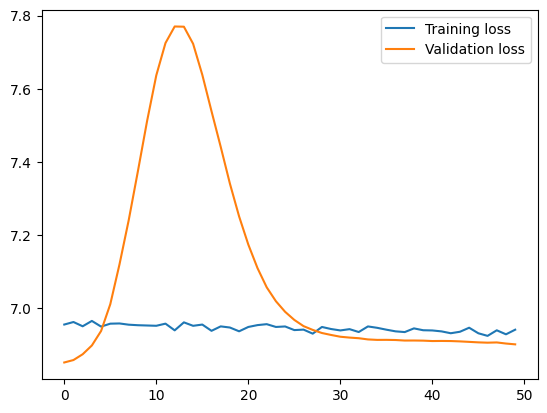

In [146]:
# predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


In [57]:
additional_epochs = 50
history_additional = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=additional_epochs,  # Solo las épocas adicionales
    batch_size=200,
    verbose=0,
    callbacks=[print_callback]
)


    Epoch 5, Accuracy: 0.5040, Loss: 1.7424
                     Val_accuracy: 0.4979, Val Loss: 1.7347
          

    Epoch 10, Accuracy: 0.5040, Loss: 1.6692
                     Val_accuracy: 0.4979, Val Loss: 1.6619
          

    Epoch 15, Accuracy: 0.5040, Loss: 1.6003
                     Val_accuracy: 0.4979, Val Loss: 1.5935
          

    Epoch 20, Accuracy: 0.5040, Loss: 1.5358
                     Val_accuracy: 0.4979, Val Loss: 1.5293
          

    Epoch 25, Accuracy: 0.5040, Loss: 1.4752
                     Val_accuracy: 0.4979, Val Loss: 1.4692
          

    Epoch 30, Accuracy: 0.5040, Loss: 1.4185
                     Val_accuracy: 0.4979, Val Loss: 1.4129
          

    Epoch 35, Accuracy: 0.5040, Loss: 1.3655
                     Val_accuracy: 0.4979, Val Loss: 1.3603
          

    Epoch 40, Accuracy: 0.5040, Loss: 1.3161
                     Val_accuracy: 0.4979, Val Loss: 1.3112
          

    Epoch 45, Accuracy: 0.5040, Loss: 1.2700
                   

Accuracy: 0.5747599451303155


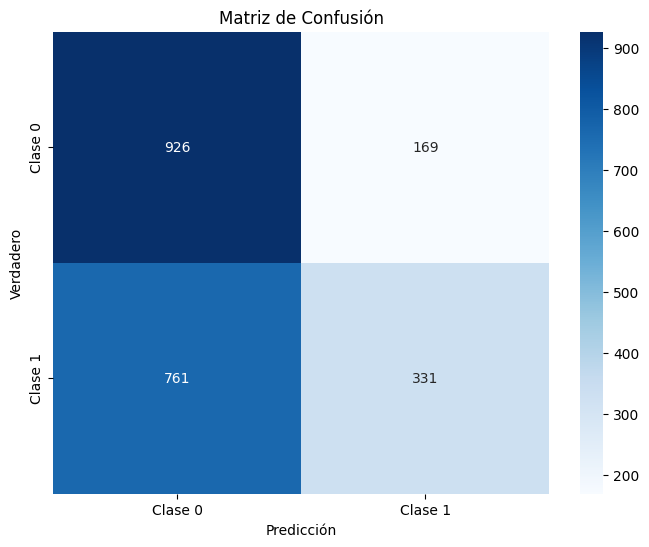

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


conf_matrix = confusion_matrix(y_test, predicted_classes)

labels = ['Clase 0', 'Clase 1']
accuracy = accuracy_score(y_test, predicted_classes)

print(f"Accuracy: {accuracy}")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()


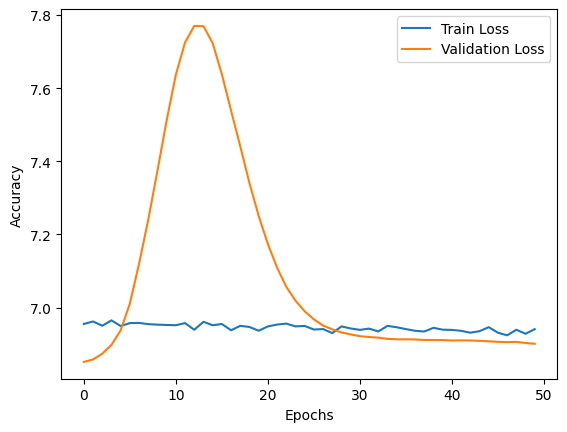

In [137]:
import matplotlib.pyplot as plt
# Combinar históricos
history_train = []
history_val = []
history_train = history_train + history.history['loss']
history_val = history_val + history.history['val_loss']

history_train = history_train + history_additional.history['loss']
history_val = history_val + history_additional.history['val_loss']

plt.plot(history_train, label='Train Loss')
plt.plot(history_val, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


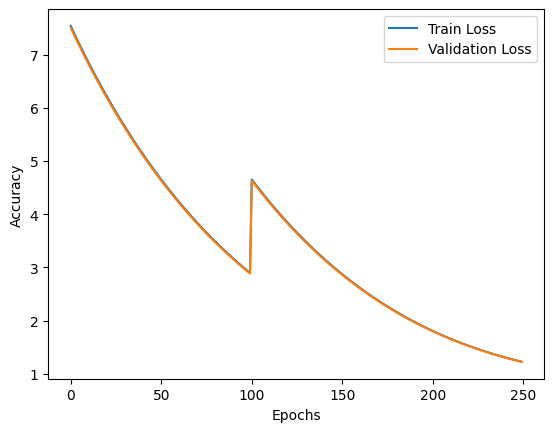

In [60]:
import matplotlib.pyplot as plt
# Combinar históricos

history_train = history_train + history_additional.history['loss']
history_val = history_val + history_additional.history['val_loss']

plt.plot(history_train, label='Train Loss')
plt.plot(history_val, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [138]:
pd.Series(y_train).value_counts()

,count
1,3318
0,3242


In [139]:
100*3318/(3318+1682)

66.36

In [82]:
import numpy as np

# Inspección del formato de los datos
def inspect_data(data, name="Data"):
    print(f"\n{name}:")
    print(f"Tipo de dato: {type(data)}")
    print(f"Forma (shape): {data.shape if isinstance(data, np.ndarray) else 'N/A'}")
    print(f"Tipo de valores: {data.dtype if isinstance(data, np.ndarray) else 'N/A'}")
    print(f"Primeros 5 elementos:\n{data[:5]}")
    if len(data.shape) == 3:  # Si es un tensor 3D (samples, timesteps, features)
        print(f"Ejemplo de primera serie temporal:\n{data[0]}")

# Inspección de los datos de entrada y salida
inspect_data(input, name="Datos de entrada (inputs)")
inspect_data(output, name="Etiquetas (labels)")


Datos de entrada (inputs):
Tipo de dato: <class 'numpy.ndarray'>
Forma (shape): (10934, 4000, 1)
Tipo de valores: float32
Primeros 5 elementos:
[[[0.54584825]
  [0.5308212 ]
  [0.57378876]
  ...
  [0.55921453]
  [0.58739513]
  [0.5167251 ]]

 [[0.4737647 ]
  [0.72250056]
  [0.7807546 ]
  ...
  [0.79239106]
  [0.4189526 ]
  [0.38128656]]

 [[0.5741213 ]
  [0.54389024]
  [0.56731415]
  ...
  [0.57475966]
  [0.53479934]
  [0.4980117 ]]

 [[0.46765158]
  [0.501198  ]
  [0.6825184 ]
  ...
  [0.45162606]
  [0.4946724 ]
  [0.5539181 ]]

 [[0.5122262 ]
  [0.5724243 ]
  [0.5521321 ]
  ...
  [0.619145  ]
  [0.5363863 ]
  [0.53216374]]]
Ejemplo de primera serie temporal:
[[0.54584825]
 [0.5308212 ]
 [0.57378876]
 ...
 [0.55921453]
 [0.58739513]
 [0.5167251 ]]

Etiquetas (labels):
Tipo de dato: <class 'numpy.ndarray'>
Forma (shape): (10934,)
Tipo de valores: int64
Primeros 5 elementos:
[0 1 0 0 0]
